In [15]:
from data_loader import YahooStockDataSource
from trading_functions import MyTradingFunctions
from trading_params import MyTradingParams
from trading_system import TradingSystem
from backtest_evaluator import BacktestEvaluator
from plotting import plot_trade_signals
import matplotlib.pyplot as plt
import numpy as np


# Define your test parameters
symbols = ['AAPL']
start_date = '2024-01-01'
end_date = '2024-12-31'

# Load the data
data_source = YahooStockDataSource(symbols, start_date, end_date)

# View the full dataframe (multi-indexed: [symbol, OHLCV])
data_source.data.head()


Ticker            AAPL                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2024-01-02  186.033072  187.315382  182.792533  184.532089  82488700
2024-01-03  183.120571  184.770668  182.335277  183.150391  58414500
2024-01-04  181.062914  181.997307  179.800504  180.824356  71983600
2024-01-05  180.903872  181.669266  179.094727  180.098694  62303300
2024-01-08  181.003253  184.492315  180.416778  184.452545  59144500

In [8]:
# Get just the Close prices for AAPL
close_prices = data_source.get_price_feature('AAPL', 'Close')
print("\nAAPL Close Prices:")
close_prices
close_prices.rolling(10)


AAPL Close Prices:


Rolling [window=10,center=False,axis=0,method=single]

In [3]:
from trading_functions import MyTradingFunctions
from trading_params import MyTradingParams

# Create the trading function and params
tf = MyTradingFunctions()
params = MyTradingParams(tf)

# Check instruments
print("Symbols:", params.getSymbolsToTrade())

# Check date range
print("Start:", params.getStartDate())
print("End:", params.getEndDate())

# Check starting capital
print("Starting Capital:", params.getStartingCapital())

# Check if data loaded correctly
data_loader = params.getDataLoader()
data = data_loader.data
print("\nData columns:", data.columns.levels[0])  # Should list tickers
print("Sample data:\n", data.head())


Symbols: ['AAPL']
Start: 2024-01-01
End: 2024-12-31
Starting Capital: 1000

Data columns: Index(['AAPL'], dtype='object', name='Ticker')
Sample data:
 Ticker            AAPL                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2024-01-02  186.033072  187.315382  182.792533  184.532089  82488700
2024-01-03  183.120571  184.770668  182.335277  183.150391  58414500
2024-01-04  181.062899  181.997291  179.800489  180.824341  71983600
2024-01-05  180.903888  181.669281  179.094742  180.098709  62303300
2024-01-08  181.003268  184.492330  180.416793  184.452560  59144500


In [4]:
close_prices = YahooStockDataSource(symbols, start_date, end_date).get_price_feature('AAPL')

for date in close_prices.index:
    slice_ = close_prices.loc[:date]
    prediction = tf.getPrediction(date, slice_)
    print(f"{date.date()} | Prediction: {prediction}")

2024-01-02 | Prediction: 1
2024-01-03 | Prediction: 0
2024-01-04 | Prediction: 0
2024-01-05 | Prediction: 0
2024-01-08 | Prediction: 0
2024-01-09 | Prediction: 0
2024-01-10 | Prediction: 0
2024-01-11 | Prediction: 0
2024-01-12 | Prediction: 0
2024-01-16 | Prediction: 0
2024-01-17 | Prediction: 0
2024-01-18 | Prediction: 0
2024-01-19 | Prediction: 0
2024-01-22 | Prediction: 0
2024-01-23 | Prediction: 0
2024-01-24 | Prediction: 0
2024-01-25 | Prediction: 0
2024-01-26 | Prediction: 0
2024-01-29 | Prediction: 0
2024-01-30 | Prediction: 0
2024-01-31 | Prediction: 0
2024-02-01 | Prediction: 0
2024-02-02 | Prediction: 0
2024-02-05 | Prediction: 0
2024-02-06 | Prediction: 0
2024-02-07 | Prediction: 0
2024-02-08 | Prediction: 0
2024-02-09 | Prediction: 0
2024-02-12 | Prediction: 0
2024-02-13 | Prediction: 0
2024-02-14 | Prediction: 0
2024-02-15 | Prediction: 0
2024-02-16 | Prediction: 0
2024-02-20 | Prediction: 0
2024-02-21 | Prediction: 0
2024-02-22 | Prediction: 0
2024-02-23 | Prediction: 0
2

In [15]:
close_prices.index

DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [17]:
close_prices.loc[:'2024-01-16']

Date
2024-01-02    184.532074
2024-01-03    183.150375
2024-01-04    180.824371
2024-01-05    180.098679
2024-01-08    184.452560
2024-01-09    184.035065
2024-01-10    185.078796
2024-01-11    184.482391
2024-01-12    184.810410
2024-01-16    182.534073
Name: (AAPL, Close), dtype: float64

In [9]:
class MomentumTradingFunctions:
    def __init__(self, short_window = 10, long_window = 30):
        self.short_window = short_window
        self.long_window = long_window
    
    def getSymbolsToTrade(self):
        return ['AAPL']
    
    def getPrediction(self, date, price_series):
        if len(price_series) < self.long_window:
            return 0  # not enough data
        short_ma = price_series.rolling(10).mean().iloc[-1]
        long_ma = price_series.rolling(30).mean().iloc[-1]
        # short_ma = price_series[-self.short_window:].mean()
        # long_ma = price_series[-self.long_window:].mean()

        if short_ma > long_ma:
            return 1  # Buy
        elif short_ma < long_ma:
            return -1  # Sell
        else:
            return 0  # Hold

In [10]:
# Instantiate strategy and params
momentum_tf = MomentumTradingFunctions(short_window=10, long_window=30)
momentum_params = MyTradingParams(momentum_tf)
momentum_ts = TradingSystem(momentum_params)

# Run backtest
momentum_ts.startTrading()

# Evaluate
momentum_results = momentum_ts.evaluate_performance()


🔔 Final Report 🔔
Final Cash: $169.65
Final Positions:
  AAPL: 4 units x $251.92 = $1007.69

Total Portfolio Value: $1177.34
Net PnL: $177.34

📝 Trade Log:
2024-05-03 | AAPL | BUY @ $182.52
2024-05-06 | AAPL | BUY @ $180.86
2024-05-07 | AAPL | BUY @ $181.54
2024-05-08 | AAPL | BUY @ $181.88
2024-05-09 | AAPL | BUY @ $183.70
2024-08-01 | AAPL | SELL @ $217.63
2024-08-02 | AAPL | SELL @ $219.12
2024-08-05 | AAPL | SELL @ $208.57
2024-08-06 | AAPL | SELL @ $206.54
2024-08-07 | AAPL | SELL @ $209.12
2024-08-21 | AAPL | BUY @ $225.90
2024-08-22 | AAPL | BUY @ $224.04
2024-08-23 | AAPL | BUY @ $226.34
2024-08-26 | AAPL | BUY @ $226.68
2024-08-27 | AAPL | BUY @ $227.53
2024-09-16 | AAPL | SELL @ $215.84
2024-09-17 | AAPL | SELL @ $216.31
2024-09-18 | AAPL | SELL @ $220.21
2024-09-19 | AAPL | SELL @ $228.37
2024-09-20 | AAPL | SELL @ $227.70
2024-09-27 | AAPL | BUY @ $227.29
2024-09-30 | AAPL | BUY @ $232.49
2024-10-01 | AAPL | BUY @ $225.71
2024-10-02 | AAPL | BUY @ $226.28
2024-11-05 | AAPL 

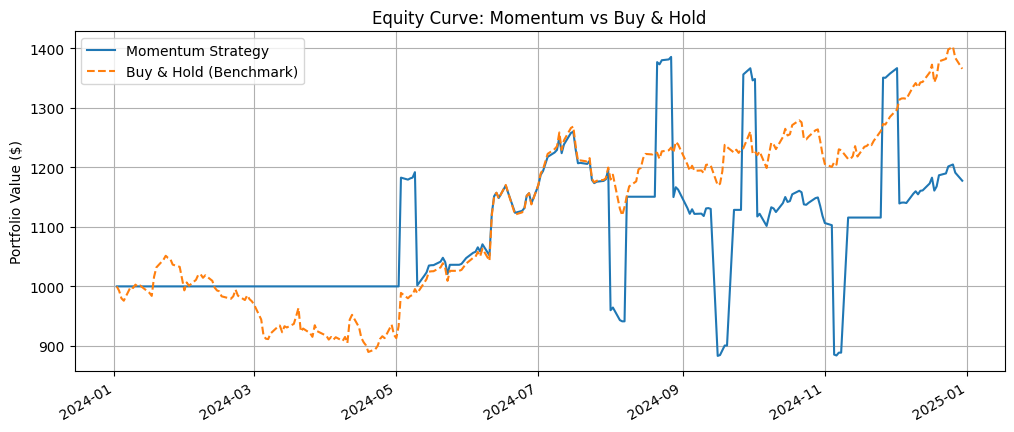

In [11]:
strategy = momentum_results['strategy']
benchmark = momentum_results['benchmark']

plt.figure(figsize=(12, 5))
strategy.plot(label='Momentum Strategy')
benchmark.plot(label='Buy & Hold (Benchmark)', linestyle='--')
plt.title('Equity Curve: Momentum vs Buy & Hold')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

,Total Return,CAGR,Sharpe Ratio,Sortino Ratio,Max Drawdown
Strategy,17.73%,17.81%,0.59,0.47,36.23%
Benchmark,36.52%,36.69%,1.51,2.40,15.35%


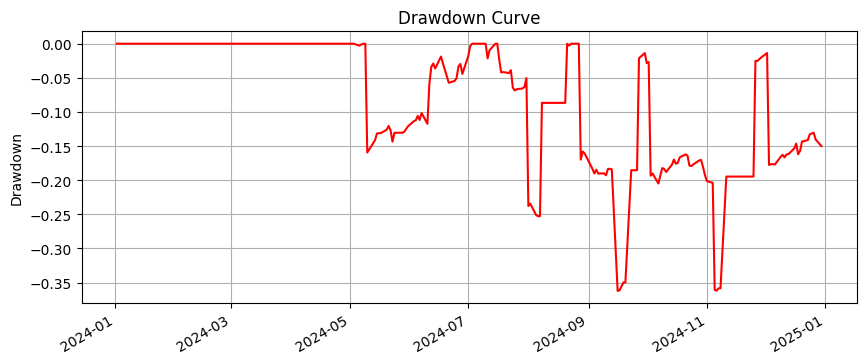

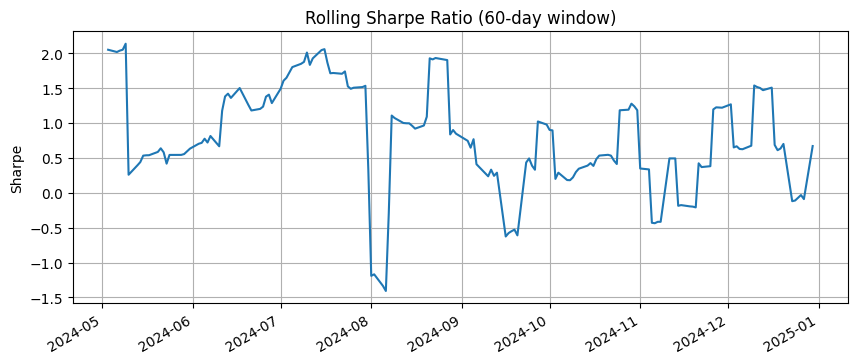

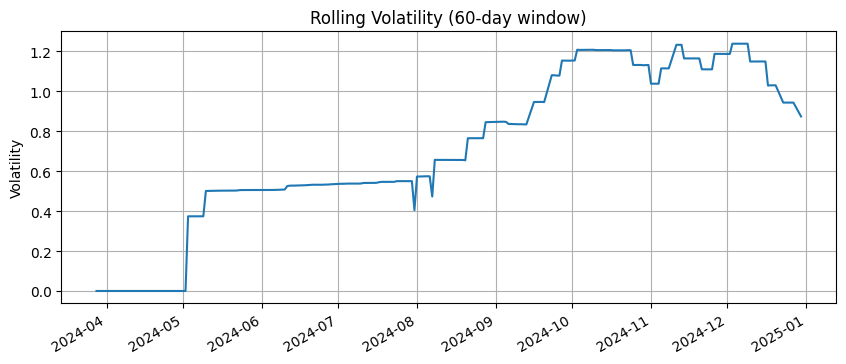

In [12]:
# Evaluate and compare
evaluator = BacktestEvaluator(strategy, benchmark)
display(evaluator.get_metrics_df())

# Plot drawdown
evaluator.plot_drawdown()

# Plot rolling Sharpe
evaluator.plot_rolling_sharpe(window=60)

# Plot rolling volatility
evaluator.plot_rolling_volatility(window=60)

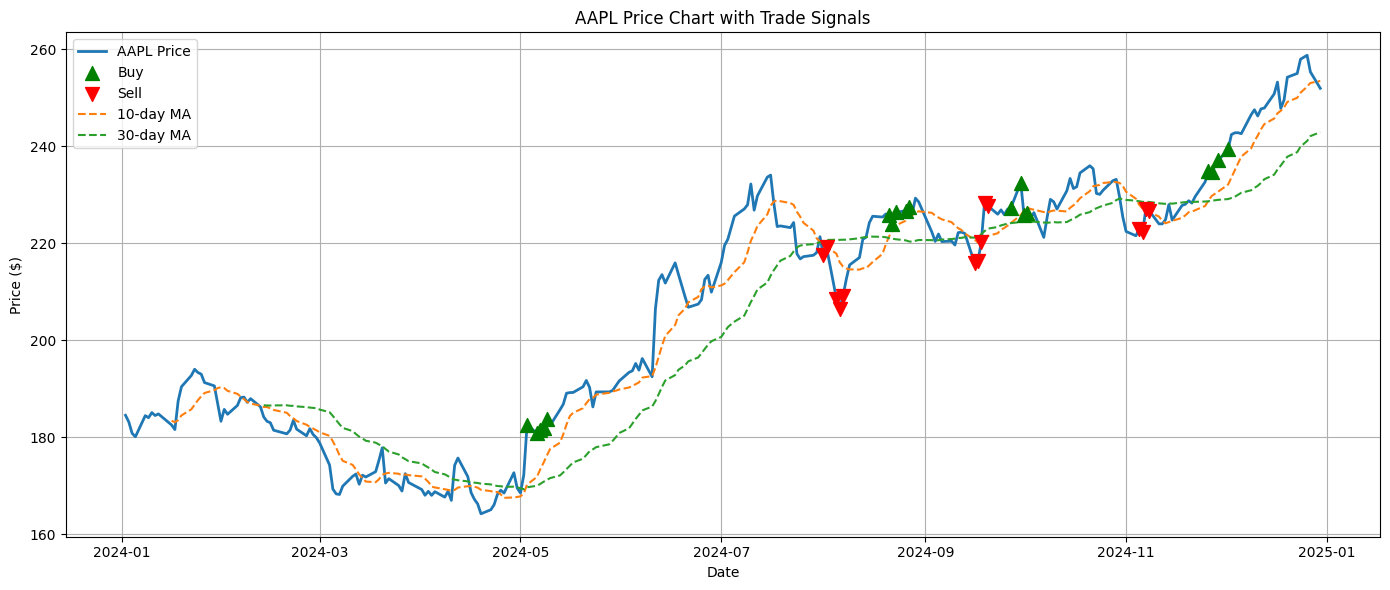

In [ ]:
symbol = 'AAPL'
price_series = momentum_ts.dataLoader.get_price_feature(symbol, 'Close')
trades = momentum_ts.trade_log

# Optional indicators
ma10 = price_series.rolling(10).mean()
ma30 = price_series.rolling(30).mean()
indicators = {
    '10-day MA': ma10,
    '30-day MA': ma30
}

# Plot!
plot_trade_signals(price_series, trades, symbol, indicators)


### Hurst Exponent Strategy

In [ ]:
class HurstMomentumStrategy:
    def __init__(self, short_mom=10, long_mom=30, ma_period=90):
        self.short_mom = short_mom
        self.long_mom = long_mom
        self.ma_period = ma_period
        self.in_position = False  # Optional: for position-aware trading

    def getSymbolsToTrade(self):
        return ['AAPL']

    def hurst_exponent(self, ts, lags=20):
        
        # interpretation of return value
        # hurst < 0.5 - input_ts is mean reverting
        # hurst = 0.5 - input_ts is effectively random/geometric brownian motion
        # hurst > 0.5 - input_ts is trending
        
        tau = []
        lagvec = []
        ts = ts.dropna().values  # Ensure no NaNs

        if len(ts) < lags:
            return 0.5  # Not enough data

        for lag in range(2, lags):
            pp = np.subtract(ts[lag:], ts[:-lag])
            lagvec.append(lag)
            tau.append(np.sqrt(np.std(pp)))

        m = np.polyfit(np.log10(lagvec), np.log10(tau), 1)
        hurst = m[0] * 2
        return hurst

    def getPrediction(self, date, price_series):
        if len(price_series) < self.ma_period:
            return 0  # Not enough data to act

        short_mom = price_series.pct_change(self.short_mom).iloc[-1]
        long_mom = price_series.pct_change(self.long_mom).iloc[-1]

        # Moving average series for Hurst calculation
        ma_series = price_series.rolling(self.ma_period).mean()
        hurst = self.hurst_exponent(ma_series.dropna())

        if hurst > 0.5:
            if short_mom > 0 and long_mom > 0:
                return 1  # Buy
            elif short_mom < 0 and long_mom < 0:
                return -1  # Sell
            else:
                return 0  # Exit/hold flat
        else:
            return 0  # No position if not trending
        
    def getIndicatorSeries(self, price_series):
        """Optional: Return indicators for plotting"""
        return {
            f'{self.short_mom}-day Momentum': price_series.pct_change(self.short_mom),
            f'{self.long_mom}-day Momentum': price_series.pct_change(self.long_mom),
            f'{self.ma_period}-day MA': price_series.rolling(self.ma_period).mean()
        }
